#**Weather Data Analysis**

### ***Import Libraries***

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

###Step 1: Load the Data

In [4]:
df = pd.read_csv('/content/weather.csv')


###Step 2: Data Exploration

In [5]:
print(df.head)


<bound method NDFrame.head of      MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0        8.0     24.3       0.0          3.4       6.3          NW   
1       14.0     26.9       3.6          4.4       9.7         ENE   
2       13.7     23.4       3.6          5.8       3.3          NW   
3       13.3     15.5      39.8          7.2       9.1          NW   
4        7.6     16.1       2.8          5.6      10.6         SSE   
..       ...      ...       ...          ...       ...         ...   
361      9.0     30.7       0.0          7.6      12.1         NNW   
362      7.1     28.4       0.0         11.6      12.7           N   
363     12.5     19.9       0.0          8.4       5.3         ESE   
364     12.5     26.9       0.0          5.0       7.1          NW   
365     12.3     30.2       0.0          6.0      12.6          NW   

     WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0             30.0         SW         NW           6.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [7]:
print(df.describe())

          MinTemp     MaxTemp    Rainfall  Evaporation    Sunshine  \
count  366.000000  366.000000  366.000000   366.000000  363.000000   
mean     7.265574   20.550273    1.428415     4.521858    7.909366   
std      6.025800    6.690516    4.225800     2.669383    3.481517   
min     -5.300000    7.600000    0.000000     0.200000    0.000000   
25%      2.300000   15.025000    0.000000     2.200000    5.950000   
50%      7.450000   19.650000    0.000000     4.200000    8.600000   
75%     12.500000   25.500000    0.200000     6.400000   10.500000   
max     20.900000   35.800000   39.800000    13.800000   13.600000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count     364.000000    359.000000    366.000000   366.000000   366.000000   
mean       39.840659      9.651811     17.986339    72.035519    44.519126   
std        13.059807      7.951929      8.856997    13.137058    16.850947   
min        13.000000      0.000000      0.000000    36.00

In [11]:
df.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm       int64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Cloud9am           int64
Cloud3pm           int64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [13]:
df.shape

(366, 22)

In [14]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

###Step 3: Data Visualization

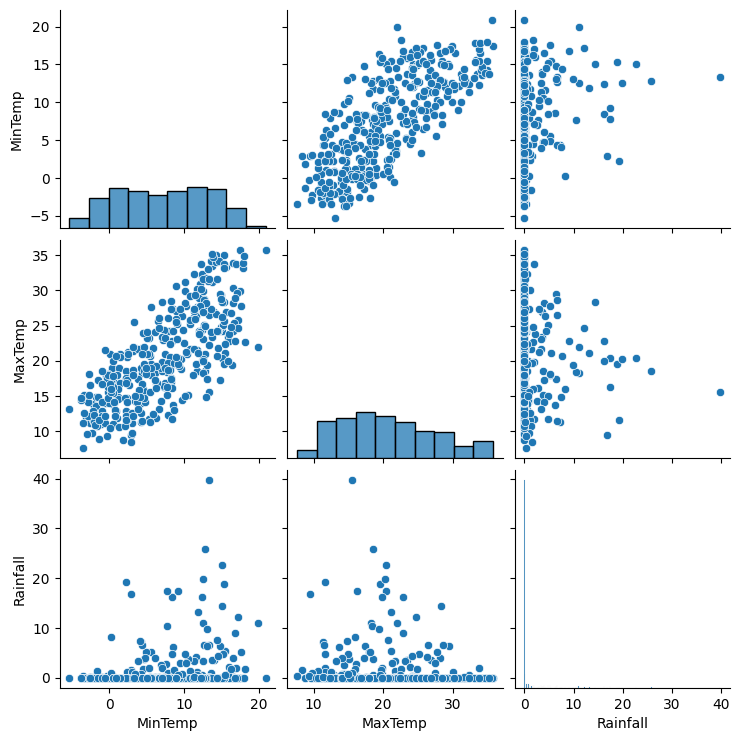

In [15]:
sns.pairplot(df[['MinTemp', 'MaxTemp', 'Rainfall']])
plt.show()


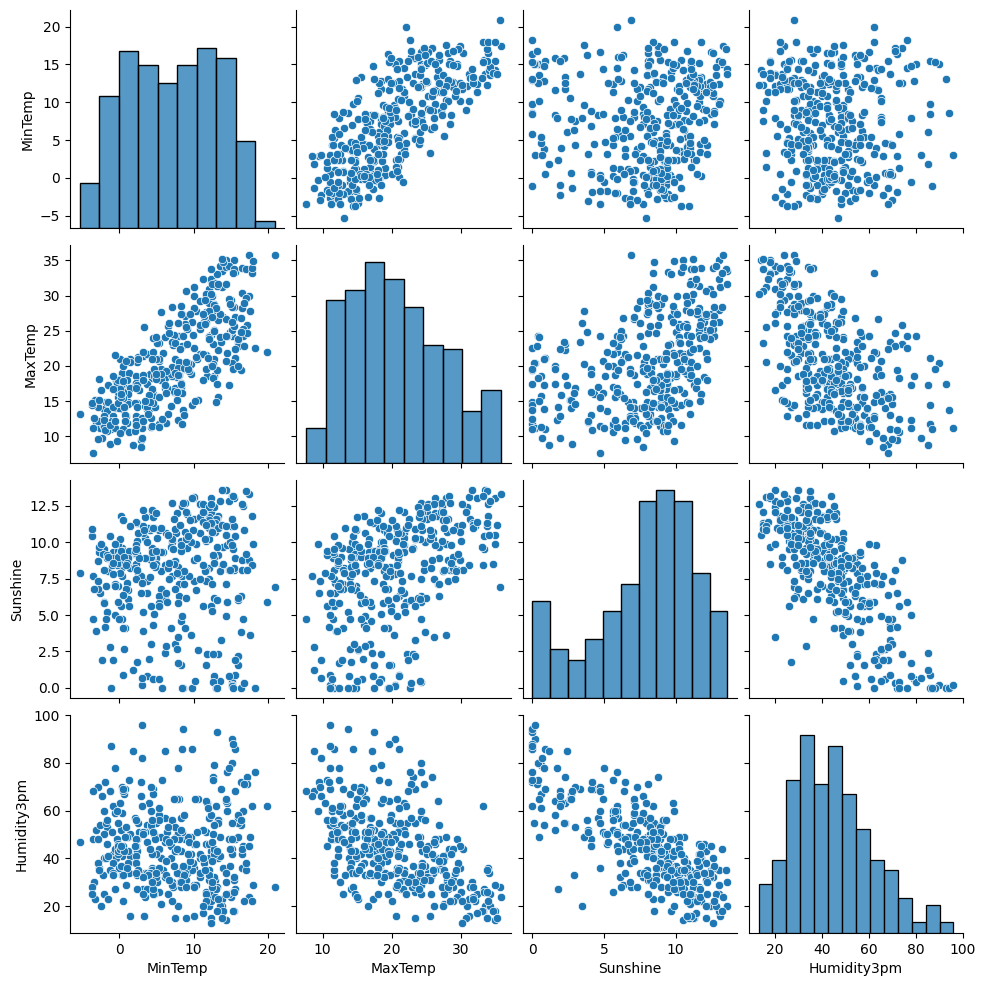

In [16]:
sns.pairplot(df[['MinTemp', 'MaxTemp', 'Sunshine','Humidity3pm']])

<Axes: >

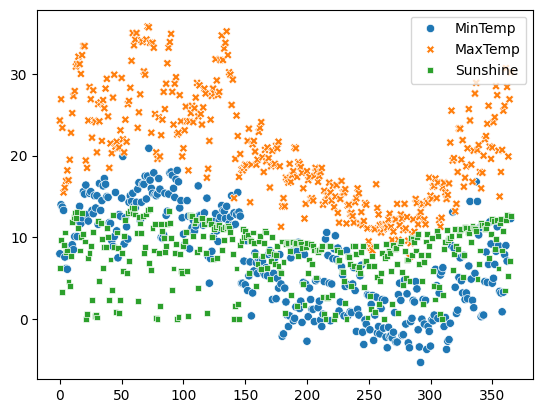

In [17]:
sns.scatterplot(df[['MinTemp', 'MaxTemp', 'Sunshine']])

<Axes: >

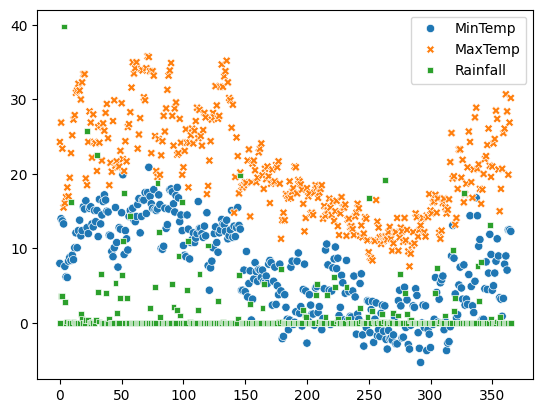

In [18]:
sns.scatterplot(df[['MinTemp', 'MaxTemp', 'Rainfall']])

###**Step 4: Feature Engineering**

In [19]:
# Handle missing values
df.fillna(method='ffill', inplace=True)

# Convert categorical features to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday','RainTomorrow'])

# Create new features
df['TempRange'] = df['MaxTemp'] - df['MinTemp']  # Example new feature


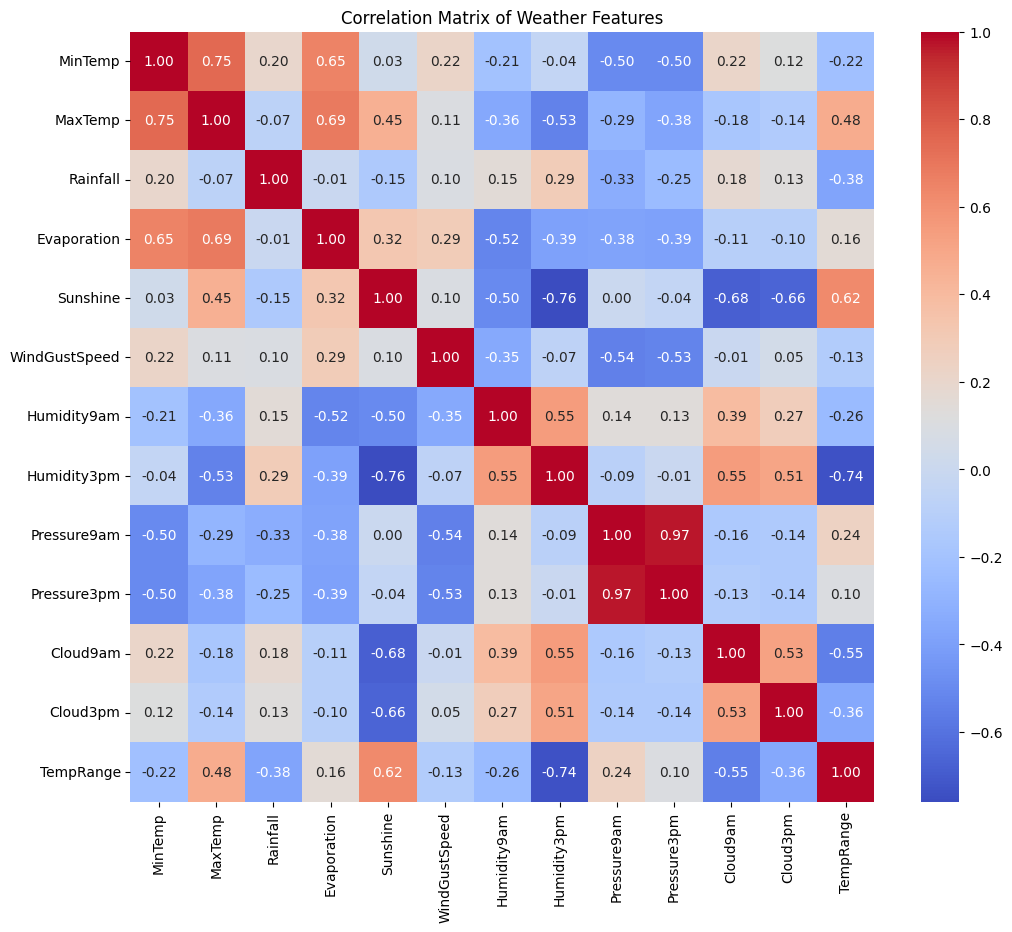

In [21]:
# Calculate correlations
correlation_matrix = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'TempRange']].corr()

# Visualize correlations using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Weather Features')
plt.show()


###**Step 5: Data Analysis**

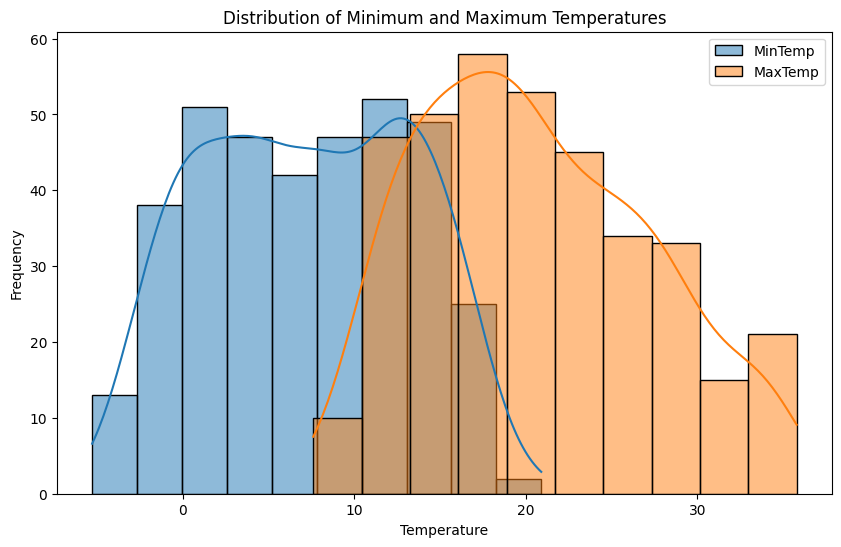

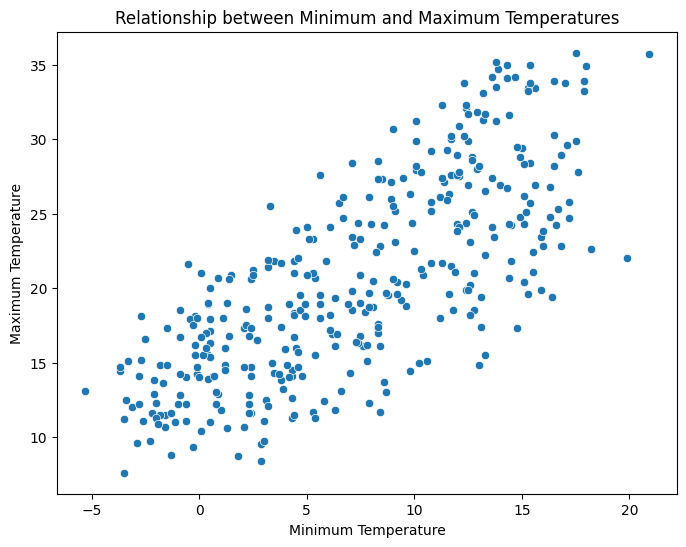

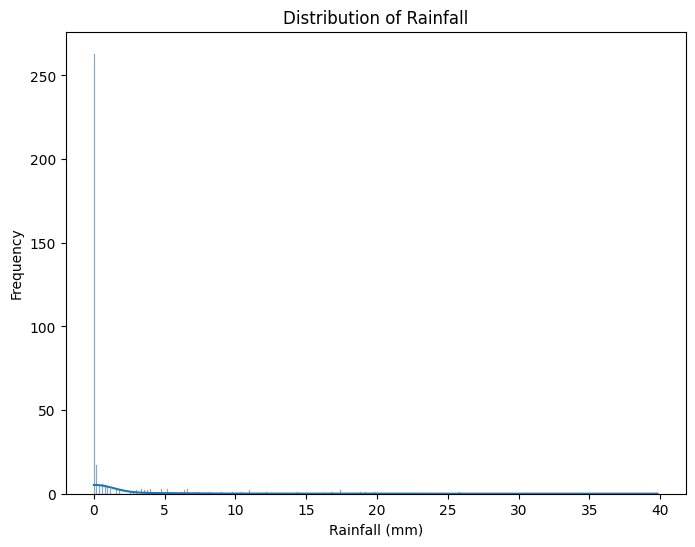

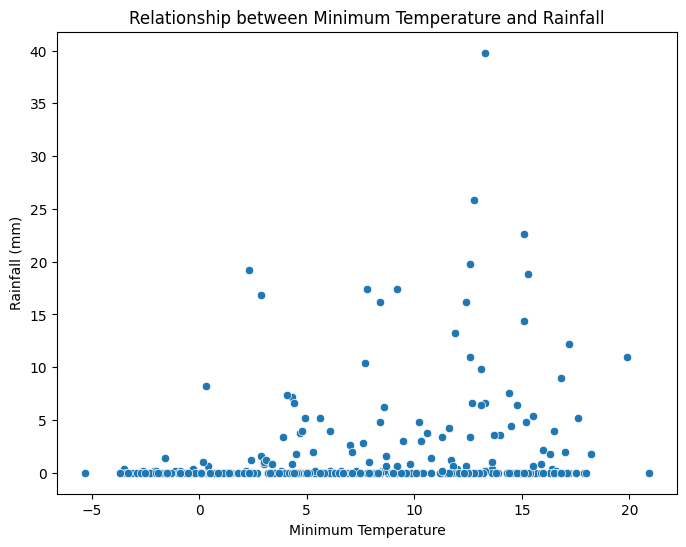

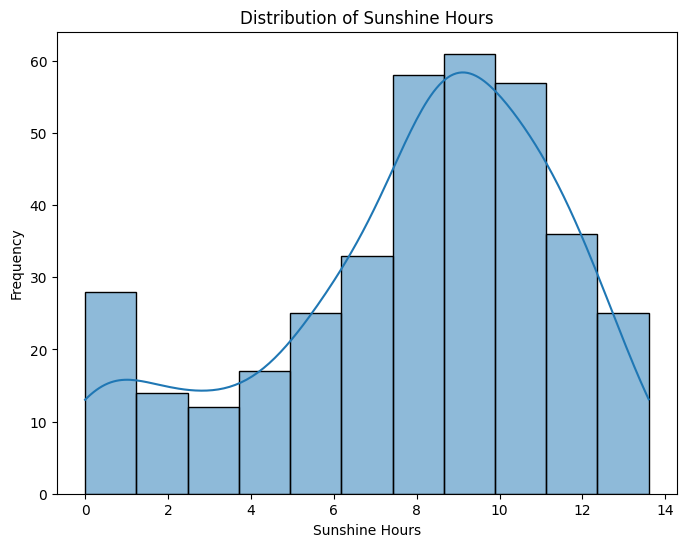

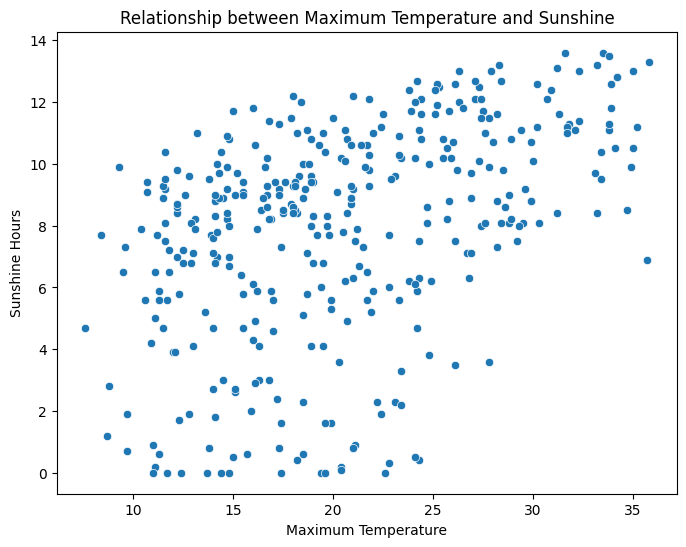

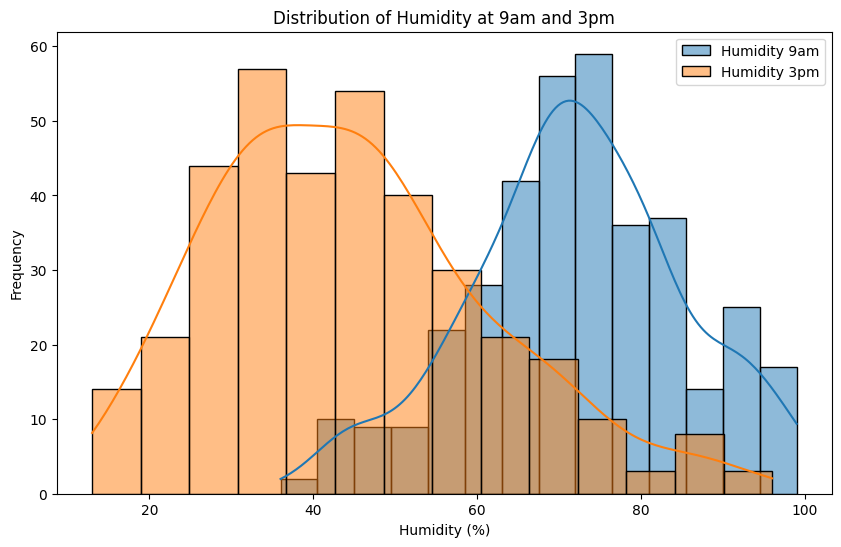

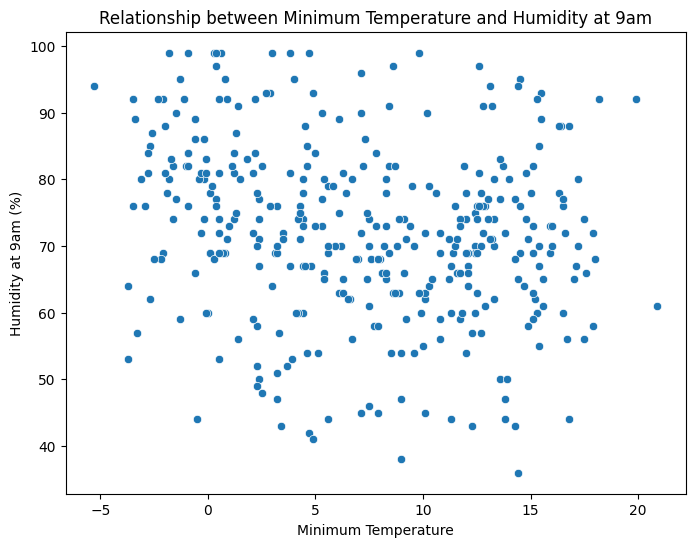

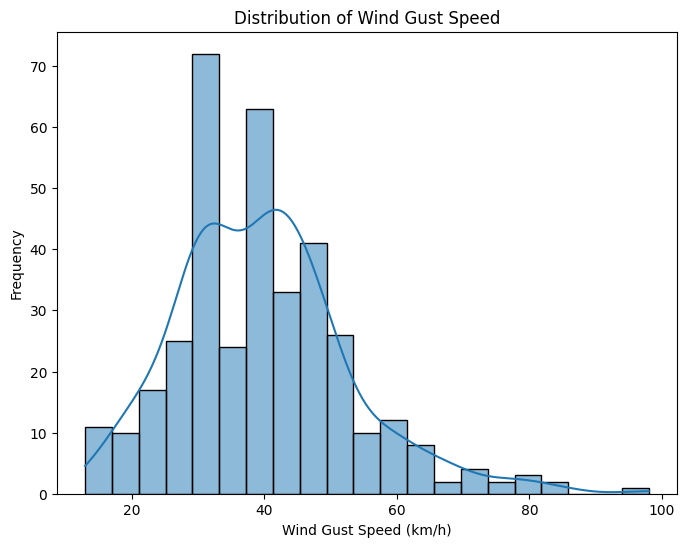

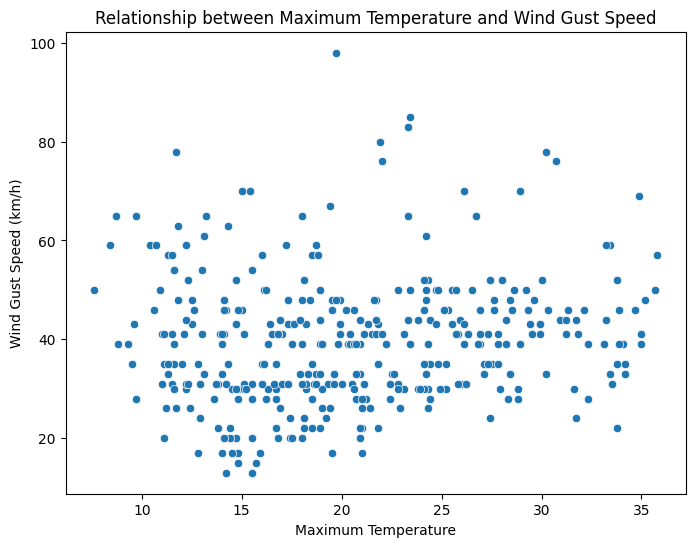

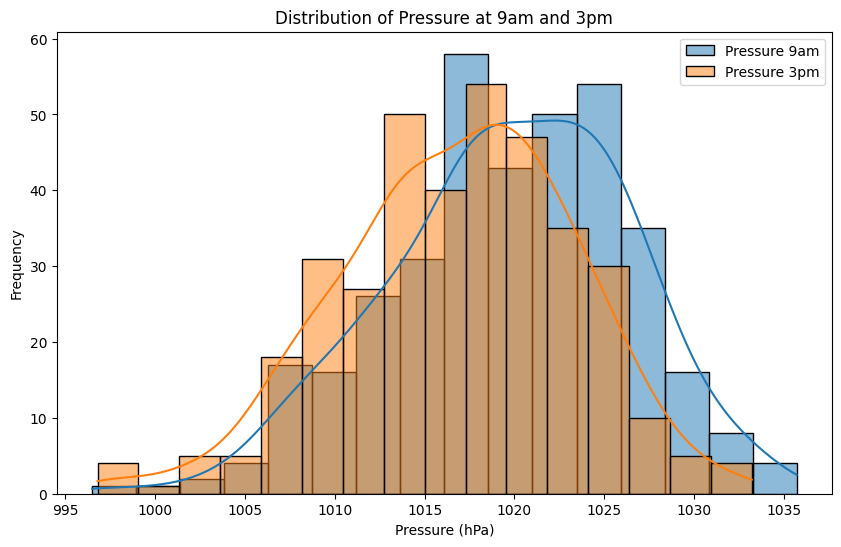

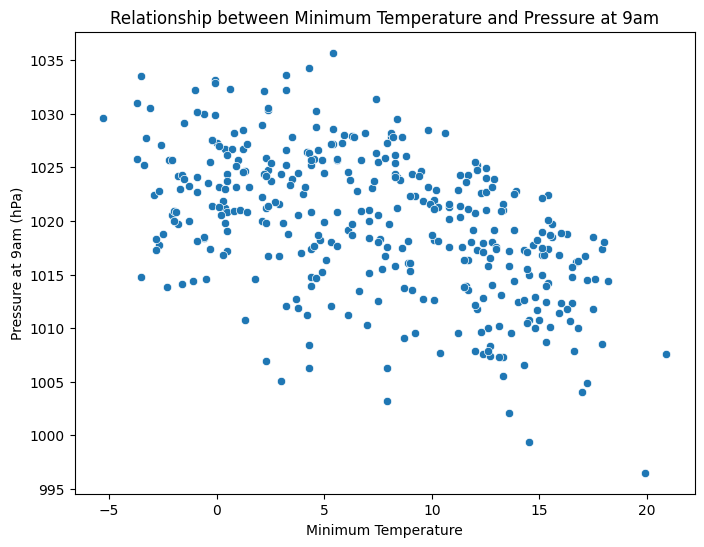

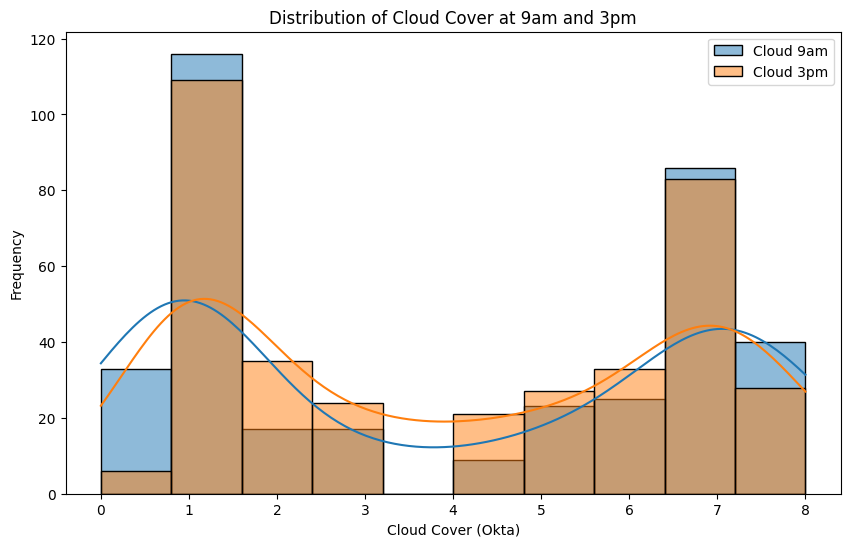

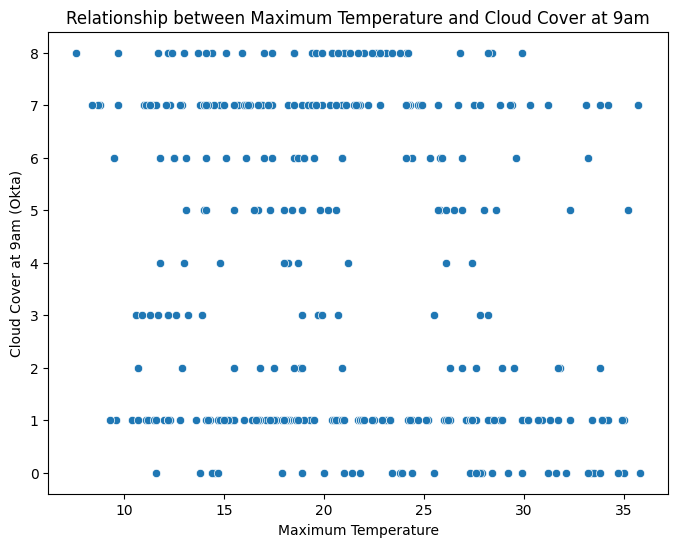

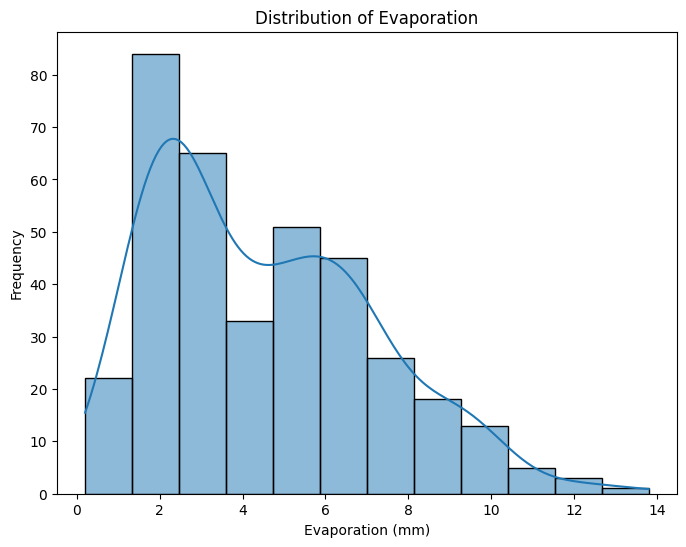

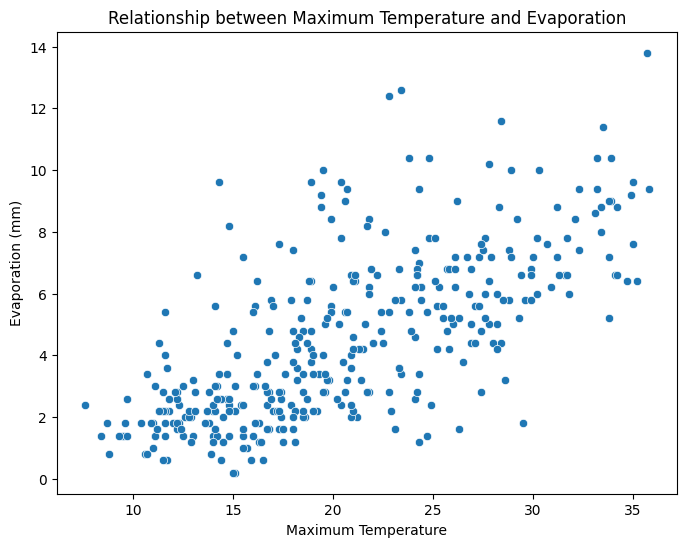

In [22]:
# Distribution of Minimum and Maximum Temperatures
plt.figure(figsize=(10, 6))
sns.histplot(df['MinTemp'], kde=True, label='MinTemp')
sns.histplot(df['MaxTemp'], kde=True, label='MaxTemp')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Minimum and Maximum Temperatures')
plt.legend()
plt.show()

# Relationship between MinTemp and MaxTemp
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MinTemp', y='MaxTemp', data=df)
plt.xlabel('Minimum Temperature')
plt.ylabel('Maximum Temperature')
plt.title('Relationship between Minimum and Maximum Temperatures')
plt.show()

# **Rainfall Analysis**

# Distribution of Rainfall
plt.figure(figsize=(8, 6))
sns.histplot(df['Rainfall'], kde=True)
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.title('Distribution of Rainfall')
plt.show()

# Relationship between Rainfall and Temperature
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MinTemp', y='Rainfall', data=df)
plt.xlabel('Minimum Temperature')
plt.ylabel('Rainfall (mm)')
plt.title('Relationship between Minimum Temperature and Rainfall')
plt.show()

# **Sunshine Analysis**

# Distribution of Sunshine Hours
plt.figure(figsize=(8, 6))
sns.histplot(df['Sunshine'], kde=True)
plt.xlabel('Sunshine Hours')
plt.ylabel('Frequency')
plt.title('Distribution of Sunshine Hours')
plt.show()

# Relationship between Sunshine and Temperature
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MaxTemp', y='Sunshine', data=df)
plt.xlabel('Maximum Temperature')
plt.ylabel('Sunshine Hours')
plt.title('Relationship between Maximum Temperature and Sunshine')
plt.show()

# **Humidity Analysis**

# Distribution of Humidity at 9am and 3pm
plt.figure(figsize=(10, 6))
sns.histplot(df['Humidity9am'], kde=True, label='Humidity 9am')
sns.histplot(df['Humidity3pm'], kde=True, label='Humidity 3pm')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Humidity at 9am and 3pm')
plt.legend()
plt.show()

# Relationship between Humidity and Temperature
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MinTemp', y='Humidity9am', data=df)
plt.xlabel('Minimum Temperature')
plt.ylabel('Humidity at 9am (%)')
plt.title('Relationship between Minimum Temperature and Humidity at 9am')
plt.show()

# **Wind Analysis**

# Distribution of Wind Gust Speed
plt.figure(figsize=(8, 6))
sns.histplot(df['WindGustSpeed'], kde=True)
plt.xlabel('Wind Gust Speed (km/h)')
plt.ylabel('Frequency')
plt.title('Distribution of Wind Gust Speed')
plt.show()

# Relationship between Wind Gust Speed and Temperature
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MaxTemp', y='WindGustSpeed', data=df)
plt.xlabel('Maximum Temperature')
plt.ylabel('Wind Gust Speed (km/h)')
plt.title('Relationship between Maximum Temperature and Wind Gust Speed')
plt.show()

# **Pressure Analysis**

# Distribution of Pressure at 9am and 3pm
plt.figure(figsize=(10, 6))
sns.histplot(df['Pressure9am'], kde=True, label='Pressure 9am')
sns.histplot(df['Pressure3pm'], kde=True, label='Pressure 3pm')
plt.xlabel('Pressure (hPa)')
plt.ylabel('Frequency')
plt.title('Distribution of Pressure at 9am and 3pm')
plt.legend()
plt.show()

# Relationship between Pressure and Temperature
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MinTemp', y='Pressure9am', data=df)
plt.xlabel('Minimum Temperature')
plt.ylabel('Pressure at 9am (hPa)')
plt.title('Relationship between Minimum Temperature and Pressure at 9am')
plt.show()

# **Cloud Cover Analysis**

# Distribution of Cloud Cover at 9am and 3pm
plt.figure(figsize=(10, 6))
sns.histplot(df['Cloud9am'], kde=True, label='Cloud 9am')
sns.histplot(df['Cloud3pm'], kde=True, label='Cloud 3pm')
plt.xlabel('Cloud Cover (Okta)')
plt.ylabel('Frequency')
plt.title('Distribution of Cloud Cover at 9am and 3pm')
plt.legend()
plt.show()

# Relationship between Cloud Cover and Temperature
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MaxTemp', y='Cloud9am', data=df)
plt.xlabel('Maximum Temperature')
plt.ylabel('Cloud Cover at 9am (Okta)')
plt.title('Relationship between Maximum Temperature and Cloud Cover at 9am')
plt.show()

# **Evaporation Analysis**

# Distribution of Evaporation
plt.figure(figsize=(8, 6))
sns.histplot(df['Evaporation'], kde=True)
plt.xlabel('Evaporation (mm)')
plt.ylabel('Frequency')
plt.title('Distribution of Evaporation')
plt.show()

# Relationship between Evaporation and Temperature
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MaxTemp', y='Evaporation', data=df)
plt.xlabel('Maximum Temperature')
plt.ylabel('Evaporation (mm)')
plt.title('Relationship between Maximum Temperature and Evaporation')
plt.show()


In [26]:
# Create a dummy date range
date_range = pd.date_range(start='2023-01-01', periods=len(df), freq='D')

# Add the dummy date column to the DataFrame
df['Date'] = date_range

print(df.head())


   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0      8.0     24.3       0.0          3.4       6.3           30.0   
1     14.0     26.9       3.6          4.4       9.7           39.0   
2     13.7     23.4       3.6          5.8       3.3           85.0   
3     13.3     15.5      39.8          7.2       9.1           54.0   
4      7.6     16.1       2.8          5.6      10.6           50.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  WindDir3pm_SW  \
0           6.0            20           68           29  ...          False   
1           4.0            17           80           36  ...          False   
2           6.0             6           82           69  ...          False   
3          30.0            24           62           56  ...          False   
4          20.0            28           68           49  ...          False   

   WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW  RainToday_No  RainToday_Yes  \
0         False   

In [27]:
# Calculate average MaxTemp by month
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
monthly_avg_max_temp = df.groupby('Month')['MaxTemp'].mean()
print(monthly_avg_max_temp)


Month
1     25.068750
2     24.635714
3     29.312903
4     25.230000
5     25.974194
6     19.633333
7     17.112903
8     14.664516
9     11.610000
10    12.741935
11    18.026667
12    22.593548
Name: MaxTemp, dtype: float64


###**Step 6: Data Visualization (Part 2)**

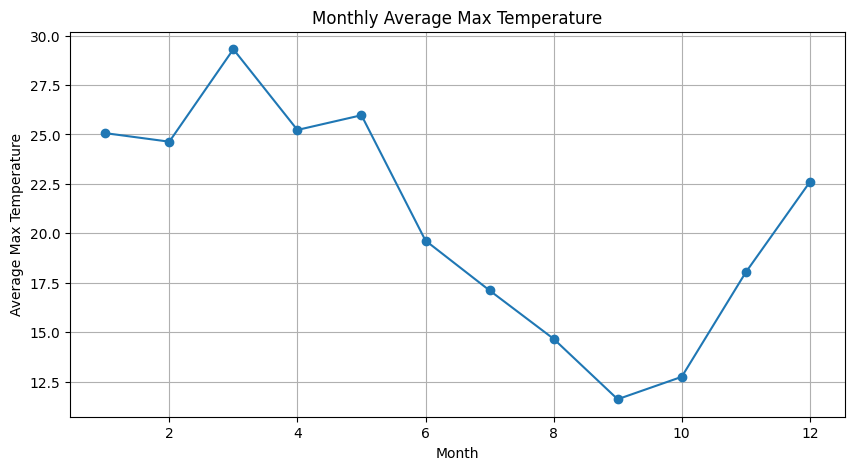

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg_max_temp.index, monthly_avg_max_temp.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Max Temperature')
plt.title('Monthly Average Max Temperature')
plt.grid(True)
plt.show()


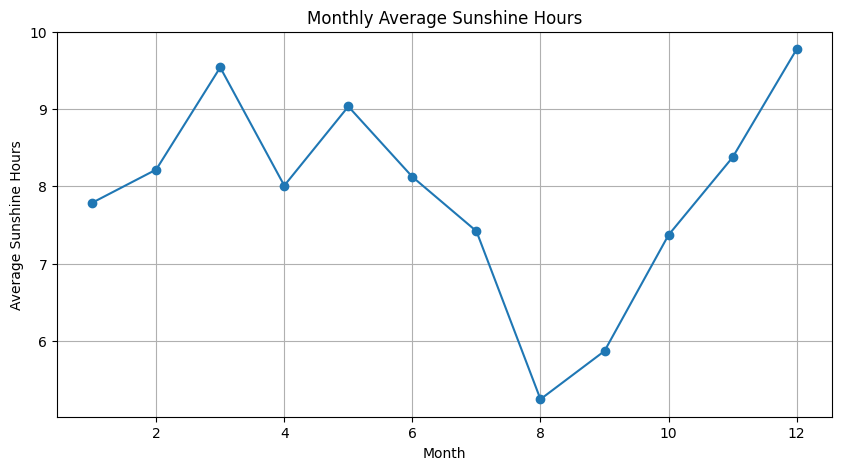

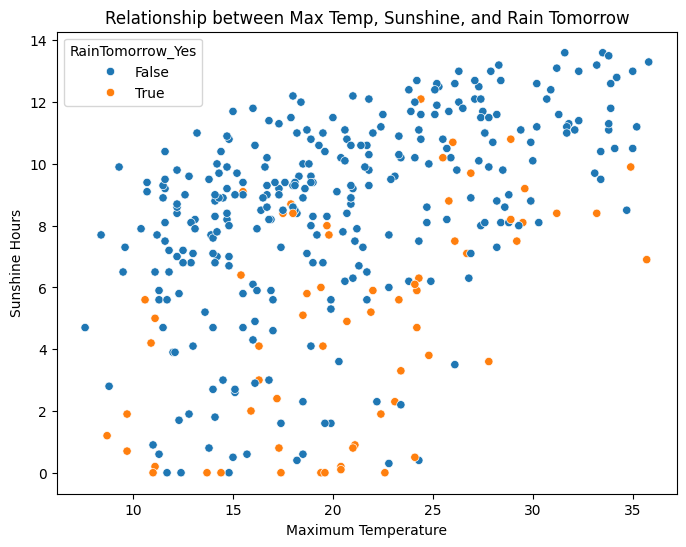

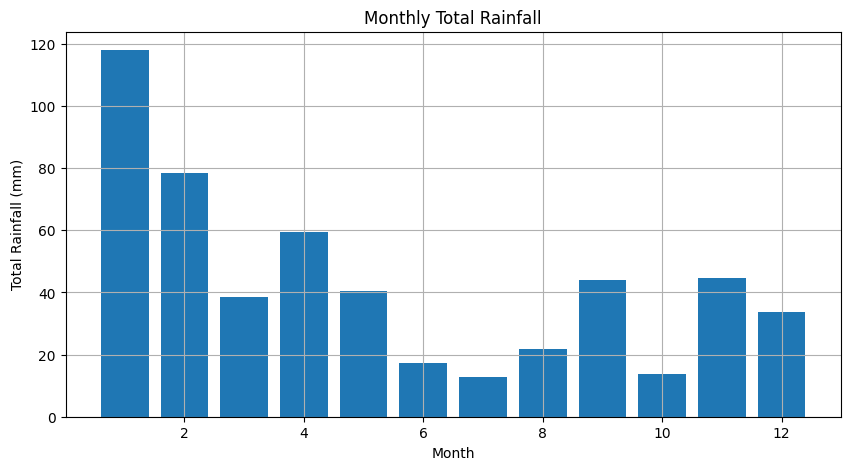

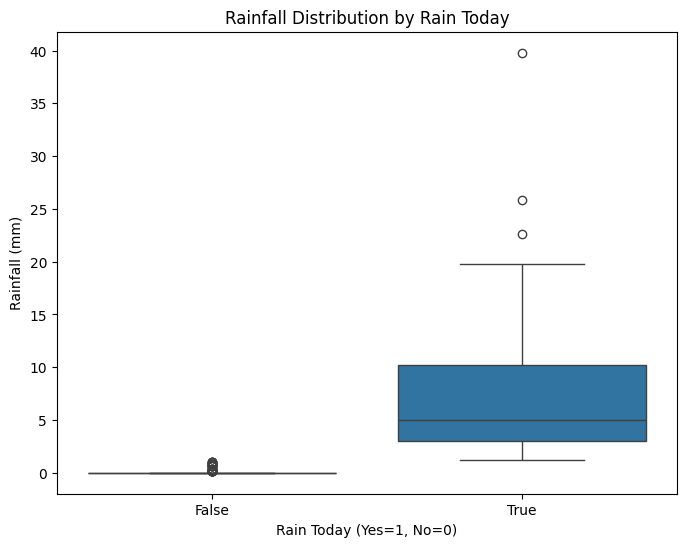

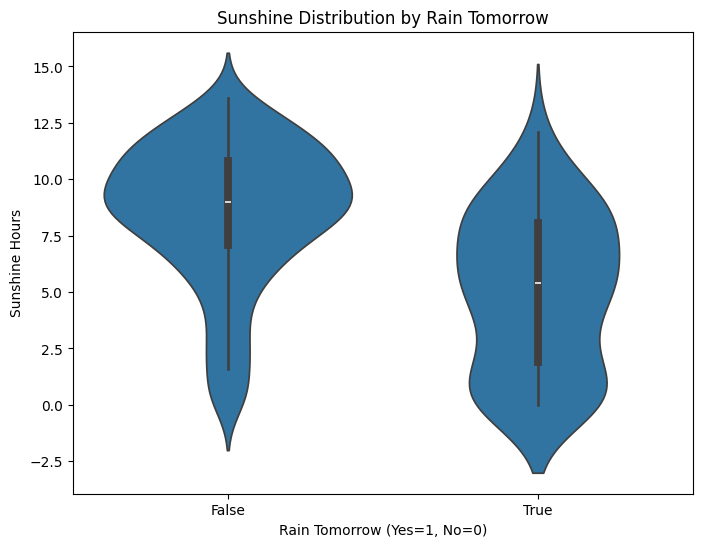

In [30]:
# Monthly Average Sunshine Hours
df['Month'] = df['Date'].dt.month
monthly_avg_sunshine = df.groupby('Month')['Sunshine'].mean()

plt.figure(figsize=(10, 5))
plt.plot(monthly_avg_sunshine.index, monthly_avg_sunshine.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Sunshine Hours')
plt.title('Monthly Average Sunshine Hours')
plt.grid(True)
plt.show()

# Relationship between Sunshine and MaxTemp with hue for RainTomorrow
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MaxTemp', y='Sunshine', hue='RainTomorrow_Yes', data=df)
plt.xlabel('Maximum Temperature')
plt.ylabel('Sunshine Hours')
plt.title('Relationship between Max Temp, Sunshine, and Rain Tomorrow')
plt.show()

# **Rainfall Analysis**

# Monthly Total Rainfall
monthly_total_rainfall = df.groupby('Month')['Rainfall'].sum()

plt.figure(figsize=(10, 5))
plt.bar(monthly_total_rainfall.index, monthly_total_rainfall.values)
plt.xlabel('Month')
plt.ylabel('Total Rainfall (mm)')
plt.title('Monthly Total Rainfall')
plt.grid(True)
plt.show()

# Boxplot of Rainfall by RainToday
plt.figure(figsize=(8, 6))
sns.boxplot(x='RainToday_Yes', y='Rainfall', data=df)
plt.xlabel('Rain Today (Yes=1, No=0)')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Distribution by Rain Today')
plt.show()

# Violin plot of Sunshine distribution by RainTomorrow
plt.figure(figsize=(8, 6))
sns.violinplot(x='RainTomorrow_Yes', y='Sunshine', data=df)
plt.xlabel('Rain Tomorrow (Yes=1, No=0)')
plt.ylabel('Sunshine Hours')
plt.title('Sunshine Distribution by Rain Tomorrow')
plt.show()


##**Step 7: Advanced Analysis Rainfall Prediction**

In [41]:
#prepare the data for rainfall prediction

# Select features and target variable
features = ['MinTemp', 'MaxTemp',]
target = 'Rainfall'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69)


In [42]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for Rainfall Prediction: {mse}')


Mean Squared Error for Rainfall Prediction: 34.118278456537745


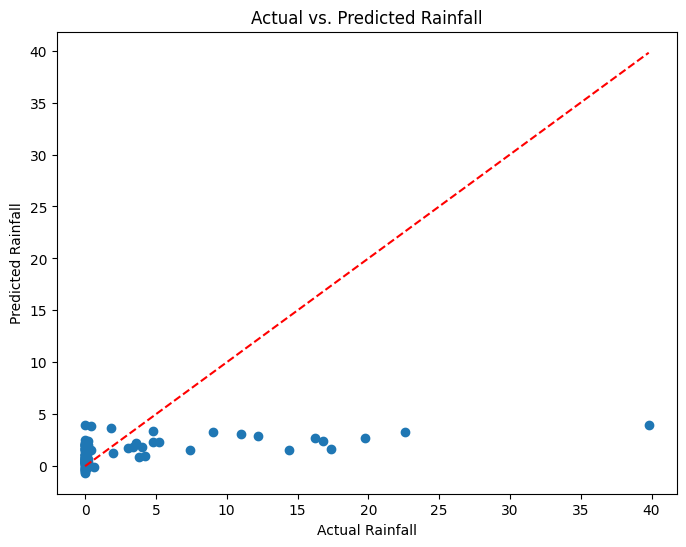

In [48]:

# Visualize actual vs. predicted rainfall
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.title('Actual vs. Predicted Rainfall')

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')

plt.show()


###**Step 8: Conclusions and Insights**

In [46]:
# Find the highest rainfall month
highest_rainfall_month = monthly_total_rainfall.idxmax()
highest_rainfall_value = monthly_total_rainfall.max()

# Find the lowest rainfall month
lowest_rainfall_month = monthly_total_rainfall.idxmin()
lowest_rainfall_value = monthly_total_rainfall.min()

print(f"Highest rainfall month: {highest_rainfall_month} ({highest_rainfall_value} mm)")
print(f"Lowest rainfall month: {lowest_rainfall_month} ({lowest_rainfall_value} mm)")


Highest rainfall month: 1 (118.0 mm)
Lowest rainfall month: 7 (12.799999999999999 mm)
